In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('cereals.csv')
data_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
data_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [4]:
data_df.drop('name', axis=1, inplace=True)
print(data_df)

   mfr type  calories  protein  fat  ...  vitamins  shelf  weight  cups     rating
0    N    C        70        4    1  ...        25      3     1.0  0.33  68.402973
1    Q    C       120        3    5  ...         0      3     1.0  1.00  33.983679
2    K    C        70        4    1  ...        25      3     1.0  0.33  59.425505
3    K    C        50        4    0  ...        25      3     1.0  0.50  93.704912
4    R    C       110        2    2  ...        25      3     1.0  0.75  34.384843
..  ..  ...       ...      ...  ...  ...       ...    ...     ...   ...        ...
72   G    C       110        2    1  ...        25      3     1.0  0.75  39.106174
73   G    C       110        1    1  ...        25      2     1.0  1.00  27.753301
74   R    C       100        3    1  ...        25      1     1.0  0.67  49.787445
75   G    C       100        3    1  ...        25      1     1.0  1.00  51.592193
76   G    C       110        2    1  ...        25      1     1.0  0.75  36.187559

[77

In [5]:
data_df.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [0]:
data_df.mfr.replace(dict(zip(list(data_df.mfr.unique()), range(7))), inplace=True)
data_df.type.replace(dict(zip(list(data_df.type.unique()), range(2))), inplace=True)

In [0]:
train, test = train_test_split(data_df, test_size=0.2)

In [0]:
def x_y_split(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return np.array(x), np.array(y)

In [0]:
x_train, y_train = x_y_split(train)
x_test, y_test = x_y_split(test)

In [10]:
regressor = linear_model.LassoLars(alpha = 0.0001)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
regressor.score(x_test, y_test)
print(y_pred)

[37.13542443 30.45592617 68.39856097 41.50293261 38.84203093 53.31960599
 45.32420539 46.8917873  64.51404933 37.84766769 33.16802156 37.0346662
 26.7373214  68.23484843 55.33621167 51.5899365 ]


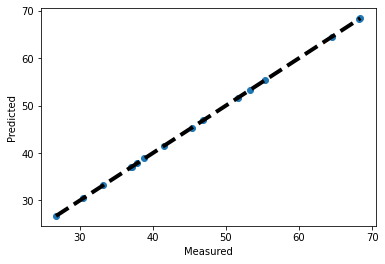

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()